In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b6ff825b4005ab25ff58d0684485e4


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >=0:
        set_count += 1
        record_count += 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 2 | hobart
Processing Record 3 of Set 2 | sisimiut
Processing Record 4 of Set 2 | valdivia
Processing Record 5 of Set 2 | vaini
Processing Record 6 of Set 2 | rikitea
Processing Record 7 of Set 2 | georgetown
Processing Record 8 of Set 2 | faanui
Processing Record 9 of Set 2 | puerto ayora
Processing Record 10 of Set 2 | chokurdakh
Processing Record 11 of Set 2 | evensk
Processing Record 12 of Set 2 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 2 | mokhsogollokh
Processing Record 14 of Set 2 | waterloo
Processing Record 15 of Set 2 | port lincoln
Processing Record 16 of Set 2 | cherskiy
Processing Record 17 of Set 2 | ixtapa
Processing Record 18 of Set 2 | nanakuli
Processing Record 19 of Set 2 | rio gallegos
Processing Record 20 of Set 2 | savonlinna
Processing Record 21 of Set 2 | luderitz
Processing Record 22 of Set 2 | albany
Processing Record 23 of Set 2 | upernavik
Pro

Processing Record 189 of Set 5 | mar del plata
Processing Record 190 of Set 5 | troitsko-pechorsk
Processing Record 191 of Set 5 | les cayes
Processing Record 192 of Set 5 | nyrob
Processing Record 193 of Set 5 | temaraia
City not found. Skipping...
Processing Record 194 of Set 5 | constantine
Processing Record 195 of Set 5 | keti bandar
Processing Record 196 of Set 5 | lorengau
Processing Record 197 of Set 5 | tukrah
Processing Record 198 of Set 5 | hasaki
Processing Record 199 of Set 5 | egvekinot
Processing Record 200 of Set 5 | halalo
City not found. Skipping...
Processing Record 201 of Set 5 | alamogordo
Processing Record 202 of Set 5 | huntsville
Processing Record 203 of Set 5 | lebu
Processing Record 204 of Set 5 | arraial do cabo
Processing Record 206 of Set 6 | ribeira grande
Processing Record 207 of Set 6 | tura
Processing Record 208 of Set 6 | kamenka
Processing Record 209 of Set 6 | pospelikha
Processing Record 210 of Set 6 | panama city
Processing Record 211 of Set 6 | oua

Processing Record 377 of Set 9 | pangnirtung
Processing Record 378 of Set 9 | moba
Processing Record 379 of Set 9 | ranot
Processing Record 380 of Set 9 | tomohon
Processing Record 381 of Set 9 | nicoya
Processing Record 382 of Set 9 | maniitsoq
Processing Record 383 of Set 9 | rabak
Processing Record 384 of Set 9 | bereda
Processing Record 385 of Set 9 | ust-kamchatsk
City not found. Skipping...
Processing Record 386 of Set 9 | riberalta
Processing Record 387 of Set 9 | krasnoye
Processing Record 388 of Set 9 | walvis bay
Processing Record 389 of Set 9 | snasa
Processing Record 390 of Set 9 | pochutla
Processing Record 391 of Set 9 | uruzgan
Processing Record 392 of Set 9 | san jeronimo
Processing Record 393 of Set 9 | iqaluit
Processing Record 394 of Set 9 | northam
Processing Record 395 of Set 9 | jalu
Processing Record 396 of Set 9 | ayagoz
Processing Record 397 of Set 9 | berlevag
Processing Record 398 of Set 9 | portage
Processing Record 399 of Set 9 | nioro
Processing Record 400

Processing Record 561 of Set 12 | lima
Processing Record 563 of Set 13 | port hedland
Processing Record 564 of Set 13 | sept-iles
Processing Record 565 of Set 13 | hualmay
Processing Record 566 of Set 13 | umzimvubu
City not found. Skipping...
Processing Record 567 of Set 13 | harper
Processing Record 568 of Set 13 | okitipupa
Processing Record 569 of Set 13 | laja
Processing Record 570 of Set 13 | clyde
Processing Record 571 of Set 13 | toora-khem
Processing Record 572 of Set 13 | kichera
Processing Record 573 of Set 13 | eureka
Processing Record 574 of Set 13 | riyadh
Processing Record 575 of Set 13 | borogontsy
Processing Record 576 of Set 13 | kimbe
Processing Record 577 of Set 13 | nome
Processing Record 578 of Set 13 | dayong
Processing Record 579 of Set 13 | lamu
Processing Record 580 of Set 13 | kizhinga
Processing Record 581 of Set 13 | san luis
Processing Record 582 of Set 13 | mount gambier
Processing Record 583 of Set 13 | russell
Processing Record 584 of Set 13 | nokaneng


In [8]:
len(city_data)

578

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,44.60,75,40,11.41,AU,2020-08-22 15:53:32
1,Sisimiut,66.94,-53.67,51.94,67,17,7.56,GL,2020-08-22 15:53:32
2,Valdivia,-39.81,-73.25,42.80,93,90,4.70,CL,2020-08-22 15:53:01
3,Vaini,-21.20,-175.20,73.40,100,20,5.82,TO,2020-08-22 15:53:32
4,Rikitea,-23.12,-134.97,66.31,71,100,18.95,PF,2020-08-22 15:53:33
5,Georgetown,5.41,100.34,80.60,88,20,3.36,MY,2020-08-22 15:53:33
6,Faanui,-16.48,-151.75,77.22,80,21,25.17,PF,2020-08-22 15:53:33
7,Puerto Ayora,-0.74,-90.35,68.00,82,75,11.41,EC,2020-08-22 15:53:33
8,Chokurdakh,70.63,147.92,32.58,97,100,5.26,RU,2020-08-22 15:53:33
9,Evensk,61.95,159.23,43.29,72,98,12.53,RU,2020-08-22 15:53:33


In [10]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-08-22 15:53:32,-42.88,147.33,44.60,75,40,11.41
1,Sisimiut,GL,2020-08-22 15:53:32,66.94,-53.67,51.94,67,17,7.56
2,Valdivia,CL,2020-08-22 15:53:01,-39.81,-73.25,42.80,93,90,4.70
3,Vaini,TO,2020-08-22 15:53:32,-21.20,-175.20,73.40,100,20,5.82
4,Rikitea,PF,2020-08-22 15:53:33,-23.12,-134.97,66.31,71,100,18.95
5,Georgetown,MY,2020-08-22 15:53:33,5.41,100.34,80.60,88,20,3.36
6,Faanui,PF,2020-08-22 15:53:33,-16.48,-151.75,77.22,80,21,25.17
7,Puerto Ayora,EC,2020-08-22 15:53:33,-0.74,-90.35,68.00,82,75,11.41
8,Chokurdakh,RU,2020-08-22 15:53:33,70.63,147.92,32.58,97,100,5.26
9,Evensk,RU,2020-08-22 15:53:33,61.95,159.23,43.29,72,98,12.53


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

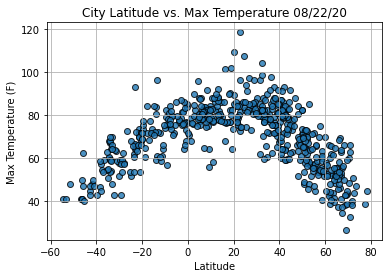

In [13]:
# Import the time module.
import time

# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

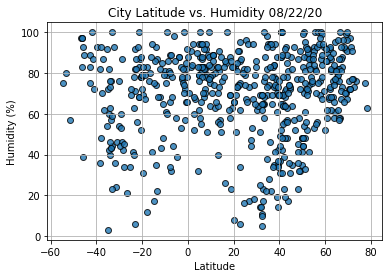

In [14]:
# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

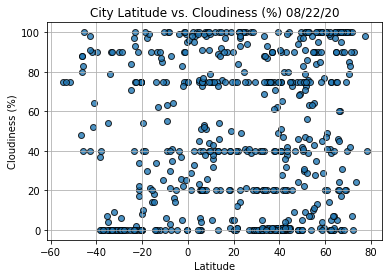

In [15]:
# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

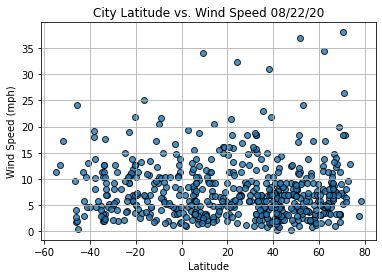

In [16]:
# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Country                        RU
Date          2020-08-22 15:53:34
Lat                         68.75
Lng                         161.3
Max Temp                    38.32
Humidity                       92
Cloudiness                    100
Wind Speed                  19.93
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

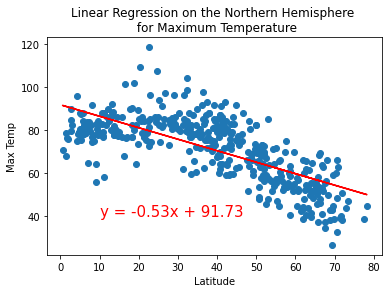

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

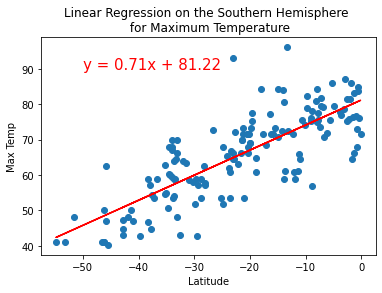

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

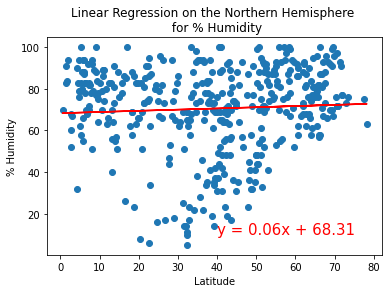

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

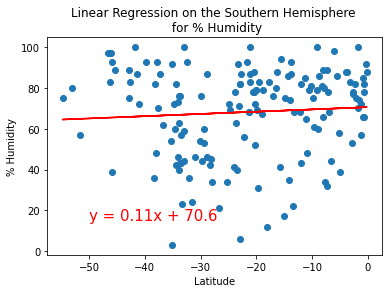

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

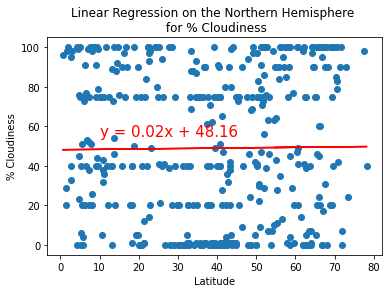

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,55))

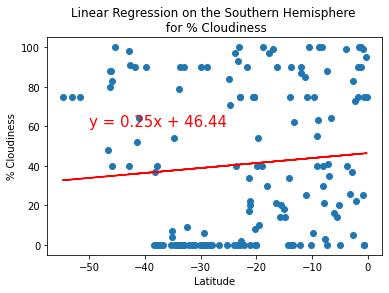

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

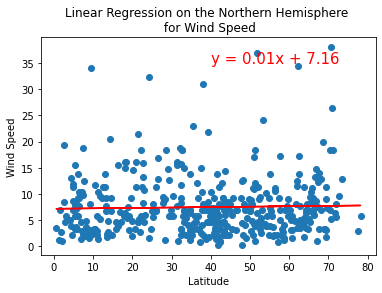

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(40,35))

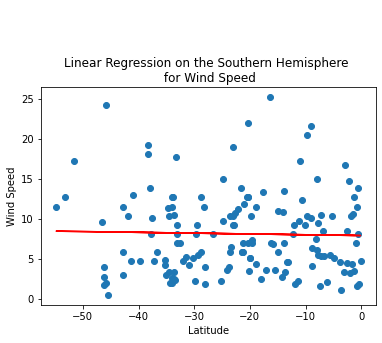

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-50,35))